# AirBnB Price Prediction

In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso


# sklearn :: evaluation metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Load the csv Data Files into Dataframe

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
# df_zip = pd.read_csv('data/zipcode.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# View Data Features, Data Type and Missing Values

In [3]:
print(df_train.columns)
df_train.head()

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,13662370,3.806662,House,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,...,41.849684,-87.676270,Pilsen Arts Community Custom Home,Pilsen,17,97.0,https://a0.muscache.com/im/pictures/81318153/a...,60608,1.0,1.0
1,4765892,4.941642,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,...,34.068613,-118.246455,Apartment 5 minutes from DTLA & Dodger Stadium,Echo Park,2,100.0,https://a0.muscache.com/im/pictures/aa00250e-0...,90012,1.0,1.0
2,21169968,4.941642,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.701958,-73.917352,"Brand New Huge 2bdr apartment(L,M train 2 min)",Bushwick,25,88.0,https://a0.muscache.com/im/pictures/d9220535-c...,11237,2.0,3.0
3,7939196,4.867534,Apartment,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,...,40.742959,-73.990820,Grande Super Large APT !!!,Flatiron District,12,82.0,NaN,10010,1.0,3.0
4,18161036,3.663562,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,...,34.046473,-117.734095,Private Cozy and Clean Rooms in Pomona,NaN,2,100.0,https://a0.muscache.com/im/pictures/e0c9b2f9-a...,91766,1.0,1.0


In [4]:
# Data types of the Feature
df_train.dtypes

id                          int64
log_price                 float64
property_type              object
room_type                  object
amenities                  object
accommodates                int64
bathrooms                 float64
bed_type                   object
cancellation_policy        object
cleaning_fee                 bool
city                       object
description                object
first_review               object
host_has_profile_pic       object
host_identity_verified     object
host_response_rate         object
host_since                 object
instant_bookable           object
last_review                object
latitude                  float64
longitude                 float64
name                       object
neighbourhood              object
number_of_reviews           int64
review_scores_rating      float64
thumbnail_url              object
zipcode                    object
bedrooms                  float64
beds                      float64
dtype: object

In [5]:
# Find the missing values
print(df_train.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64


In [6]:
print(df_train.isnull().sum())

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   133
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              10856
host_has_profile_pic        127
host_identity_verified      127
host_response_rate        12551
host_since                  127
instant_bookable              0
last_review               10826
latitude                      0
longitude                     0
name                          0
neighbourhood              4675
number_of_reviews             0
review_scores_rating      11450
thumbnail_url              5629
zipcode                     645
bedrooms                     63
beds                         85
dtype: int64


# Convert Data Type, Handle Missing Values & outliers and Fearure Re-engineering

### Feature : property_type

In [7]:
print(df_train.property_type.unique())
print(df_train['property_type'].value_counts())
df_train.groupby(by='property_type')['log_price'].mean()

['House' 'Apartment' 'Condominium' 'Guesthouse' 'Dorm' 'Other' 'Loft'
 'Townhouse' 'In-law' 'Camper/RV' 'Bungalow' 'Villa' 'Timeshare'
 'Boutique hotel' 'Guest suite' 'Bed & Breakfast' 'Castle' 'Tent' 'Cabin'
 'Hostel' 'Serviced apartment' 'Boat' 'Chalet' 'Yurt' 'Hut' 'Lighthouse'
 'Cave' 'Earth House' 'Train' 'Tipi' 'Treehouse' 'Vacation home' 'Island']
Apartment             33676
House                 11416
Condominium            1812
Townhouse              1199
Loft                    859
Other                   418
Guesthouse              329
Bed & Breakfast         309
Bungalow                243
Villa                   122
Dorm                     99
Guest suite              83
Camper/RV                63
Cabin                    56
Boutique hotel           53
Timeshare                52
Hostel                   49
In-law                   47
Boat                     45
Serviced apartment       16
Castle                   10
Tent                      9
Vacation home             7

property_type
Apartment             4.756179
Bed & Breakfast       4.562276
Boat                  5.231895
Boutique hotel        5.000182
Bungalow              4.794144
Cabin                 4.610905
Camper/RV             4.558318
Castle                5.301899
Cave                  4.909373
Chalet                4.755222
Condominium           5.031342
Dorm                  3.763096
Earth House           5.285391
Guest suite           4.751794
Guesthouse            4.669058
Hostel                3.607724
House                 4.792254
Hut                   3.799072
In-law                4.776665
Island                5.010635
Lighthouse            5.521461
Loft                  4.992789
Other                 4.934597
Serviced apartment    5.175853
Tent                  4.268997
Timeshare             5.509210
Tipi                  5.258999
Townhouse             4.832336
Train                 5.135798
Treehouse             4.169936
Vacation home         5.102172
Villa                 5.0

In [8]:
# Find the difference between 'property_type' fearure in both dataframes
df1 = df_train.property_type.unique()
df2 = df_test.property_type.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Drop the rows from df_train which contains ['property_type'] 'Cave', 'Island', 'Earth House', 'Lighthouse'
for i in diff:
    df_train = df_train[df_train['property_type'] != i]

# Create new features from property_type
df_property_type = pd.get_dummies(df_train['property_type']).astype(int)
df_train = pd.concat([df_train, df_property_type], axis=1)

# Delete 'property_type' column from df_train
del df_train['property_type']
df_train.head()

['Earth House', 'Island', 'Lighthouse', 'Cave']


,id,log_price,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,Serviced apartment,Tent,Timeshare,Tipi,Townhouse,Train,Treehouse,Vacation home,Villa,Yurt
0,13662370,3.806662,Private room,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.5,Real Bed,strict,True,Chicago,...,0,0,0,0,0,0,0,0,0,0
1,4765892,4.941642,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,2.0,Real Bed,strict,True,LA,...,0,0,0,0,0,0,0,0,0,0
2,21169968,4.941642,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,...,0,0,0,0,0,0,0,0,0,0
3,7939196,4.867534,Entire home/apt,"{""Cable TV"",Internet,""Wireless Internet"",""Air ...",6,1.0,Real Bed,strict,True,NYC,...,0,0,0,0,0,0,0,0,0,0
4,18161036,3.663562,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,True,LA,...,0,0,0,0,0,0,0,0,0,0


In [9]:
# Create new features from property_type
df_property_type = pd.get_dummies(df_test['property_type'])
df_test = pd.concat([df_test, df_property_type], axis=1)

# Delete 'property_type' column from df_train
del df_test['property_type']

### Feature : room_type

In [10]:
print(df_train.room_type.unique())
print(df_train['room_type'].value_counts())
df_train.groupby(by='room_type')['log_price'].mean()

['Private room' 'Entire home/apt' 'Shared room']
Entire home/apt    28362
Private room       21122
Shared room         1508
Name: room_type, dtype: int64


room_type
Entire home/apt    5.162808
Private room       4.327514
Shared room        3.871713
Name: log_price, dtype: float64

In [11]:
# Find the difference between 'room_type' fearure in both dataframes
df1 = df_train.room_type.unique()
df2 = df_test.room_type.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Create new features from room_type
df_room_type = pd.get_dummies(df_train['room_type']).astype(int)
df_train = pd.concat([df_train, df_room_type], axis=1)

# Delete 'room_type' column from df_train
del df_train['room_type']

[]


In [12]:
# Create new features from room_type
df_room_type = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_room_type], axis=1)

# Delete 'property_type' column from df_train
del df_test['room_type']

### Feature: amenities

In [13]:
# Create new feature with total number of amenities
df_train['#amenities'] = df_train['amenities'].str.count(",") + 1

df_train['family'] = np.where(df_train['amenities'].str.contains("Family")==True, '1', '0')
df_train['family'] = df_train['family'].astype(int)

df_train['pets'] = np.where(df_train['amenities'].str.contains("Pets allowed")==True, '1', '0')
df_train['pets'] = df_train['pets'].astype(int)

df_train['event'] = np.where(df_train['amenities'].str.contains("Suitable for events")==True, '1', '0')
df_train['event'] = df_train['event'].astype(int)

df_train['kitchen'] = np.where(df_train['amenities'].str.contains("Kitchen")==True, '1', '0')
df_train['kitchen'] = df_train['kitchen'].astype(int)

df_train['heating'] = np.where(df_train['amenities'].str.contains("Heating")==True, '1', '0')
df_train['heating'] = df_train['heating'].astype(int)

df_train['gym'] = np.where(df_train['amenities'].str.contains("Gym")==True, '1', '0')
df_train['gym'] = df_train['gym'].astype(int)

df_train['elevator'] = np.where(df_train['amenities'].str.contains("Elevator")==True, '1', '0')
df_train['elevator'] = df_train['elevator'].astype(int)

df_train['pool'] = np.where(df_train['amenities'].str.contains("Pool")==True, '1', '0')
df_train['pool'] = df_train['pool'].astype(int)

# Delete 'amenities' column from df_train
del df_train['amenities']

In [14]:
# Create new features from amenities
df_test['#amenities'] = df_test['amenities'].str.count(",") + 1

df_test['family'] = np.where(df_test['amenities'].str.contains("Family")==True, '1', '0')
df_test['family'] = df_test['family'].astype(int)

df_test['pets'] = np.where(df_test['amenities'].str.contains("Pets allowed")==True, '1', '0')
df_test['pets'] = df_test['pets'].astype(int)

df_test['event'] = np.where(df_test['amenities'].str.contains("Suitable for events")==True, '1', '0')
df_test['event'] = df_test['event'].astype(int)

df_test['kitchen'] = np.where(df_test['amenities'].str.contains("Kitchen")==True, '1', '0')
df_test['kitchen'] = df_test['kitchen'].astype(int)

df_test['heating'] = np.where(df_test['amenities'].str.contains("Heating")==True, '1', '0')
df_test['heating'] = df_test['heating'].astype(int)

df_test['gym'] = np.where(df_test['amenities'].str.contains("Gym")==True, '1', '0')
df_test['gym'] = df_test['gym'].astype(int)

df_test['elevator'] = np.where(df_test['amenities'].str.contains("Elevator")==True, '1', '0')
df_test['elevator'] = df_test['elevator'].astype(int)

df_test['pool'] = np.where(df_test['amenities'].str.contains("Pool")==True, '1', '0')
df_test['pool'] = df_test['pool'].astype(int)

# Delete 'amenities' column from df_train
del df_test['amenities']

### Feature: accommodates

In [15]:
print(df_train['accommodates'].value_counts())
df_train.groupby(by='accommodates')['log_price'].mean()

2     21989
4      8353
1      6507
3      5315
6      3321
5      2338
8      1238
7       660
10      495
16      222
12      192
9       178
14       75
11       54
15       31
13       24
Name: accommodates, dtype: int64


accommodates
1     4.179633
2     4.550311
3     4.809153
4     5.059248
5     5.244151
6     5.444440
7     5.539955
8     5.723292
9     5.669526
10    5.823928
11    5.833586
12    6.117887
13    5.893654
14    6.063651
15    6.081268
16    6.070342
Name: log_price, dtype: float64

In [16]:
# Find the difference between 'accommodates' fearure in both dataframes
df1 = df_train.accommodates.unique()
df2 = df_test.accommodates.unique()
diff = list(set(df1) - set(df2))
print(diff)

[]


### Feature: bathrooms

In [17]:
print(df_train['bathrooms'].value_counts())

1.0    40071
2.0     5377
1.5     2621
2.5     1056
3.0      745
3.5      288
4.0      192
0.5      151
0.0      139
4.5       80
5.0       46
5.5       30
8.0       25
6.0       20
7.0        9
6.5        6
7.5        3
Name: bathrooms, dtype: int64


In [18]:
# Find the difference between 'bathrooms' fearure in both dataframes
df1 = df_train.bathrooms.unique()
df2 = df_test.bathrooms.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Find the missing values
print(df_train['bathrooms'].isnull().sum())

# Replace NaN with Mean value in bathroom feature / column
df_train['bathrooms'].fillna(round(df_train['bathrooms'].mean()), inplace=True)

[nan]
133


### Feature: bed_type

In [19]:
print(df_train['bed_type'].value_counts())

Real Bed         49530
Futon              533
Pull-out Sofa      417
Airbed             331
Couch              181
Name: bed_type, dtype: int64


In [20]:
# Find the difference between 'bed_type' fearure in both dataframes
df1 = df_train.bed_type.unique()
df2 = df_test.bed_type.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Create new features from bed_type
df_bed_type = pd.get_dummies(df_train['bed_type']).astype(int)
df_train = pd.concat([df_train, df_bed_type], axis=1)

# Delete 'bed_type' column from df_train
del df_train['bed_type']

[]


In [21]:
# Create new features from bed_type
df_bed_type = pd.get_dummies(df_test['bed_type'])
df_test = pd.concat([df_test, df_bed_type], axis=1)

# Delete 'bed_type' column from df_train
del df_test['bed_type']

### Feature: cancellation_policy

In [22]:
print(df_train['cancellation_policy'].value_counts())

strict             22289
flexible           15561
moderate           13045
super_strict_30       84
super_strict_60       13
Name: cancellation_policy, dtype: int64


In [23]:
# Find the difference between 'cancellation_policy' fearure in both dataframes
df1 = df_train.cancellation_policy.unique()
df2 = df_test.cancellation_policy.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Create new features from cancellation_policy
df_cancellation_policy = pd.get_dummies(df_train['cancellation_policy']).astype(int)
df_train = pd.concat([df_train, df_cancellation_policy], axis=1)

# Delete 'cancellation_policy' column from df_train
del df_train['cancellation_policy']

[]


In [24]:
df_cancellation_policy = pd.get_dummies(df_test['cancellation_policy']).astype(int)
df_test = pd.concat([df_test, df_cancellation_policy], axis=1)

# Delete 'cancellation_policy' column from df_train
del df_test['cancellation_policy']

### Feature: city

In [25]:
print(df_train['city'].value_counts())

NYC        22255
LA         15381
SF          4487
DC          3893
Chicago     2585
Boston      2391
Name: city, dtype: int64


In [26]:
# Find the difference between 'city' fearure in both dataframes
df1 = df_train.city.unique()
df2 = df_test.city.unique()
diff = list(set(df1) - set(df2))
print(diff)

# Create new features from city
df_city = pd.get_dummies(df_train['city']).astype(int)
df_train = pd.concat([df_train, df_city], axis=1)

# # Delete 'city' column from df_train
# del df_train['city']
# df_train

[]


In [27]:
# Create new features from city
df_city = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_city], axis=1)

### Feature: description

In [28]:
# Delete column from df_train
del df_train['description']

In [29]:
# Delete column from df_train
del df_test['description']

### Feature: first_review

In [30]:
# Transform object/string Date/Time data to datetime
df_train['first_review'] = pd.to_datetime(df_train['first_review'])

# Delete column from df_train
del df_train['first_review']

In [31]:
# Delete column from df_train
del df_test['first_review']

### Feature: host_has_profile_pic

In [32]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['host_has_profile_pic'].mask(df_train['host_has_profile_pic'] == "t", "1", inplace=True)
df_train['host_has_profile_pic'].mask(df_train['host_has_profile_pic'] == "f", "0", inplace=True)
df_train['host_has_profile_pic'].fillna(0.0, inplace=True)

# Convert Data Type to Float
df_train['host_has_profile_pic'] = df_train['host_has_profile_pic'].astype(float)

In [33]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_test['host_has_profile_pic'].mask(df_test['host_has_profile_pic'] == "t", "1", inplace=True)
df_test['host_has_profile_pic'].mask(df_test['host_has_profile_pic'] == "f", "0", inplace=True)
df_test['host_has_profile_pic'].fillna(0.0, inplace=True)

# Convert Data Type to Float
df_test['host_has_profile_pic'] = df_test['host_has_profile_pic'].astype(float)

### Feature: host_identity_verified

In [34]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['host_identity_verified'].mask(df_train['host_identity_verified'] == "t", "1", inplace=True)
df_train['host_identity_verified'].mask(df_train['host_identity_verified'] == "f", "0", inplace=True)
df_train['host_identity_verified'].fillna(0.0, inplace=True)

# Convert Data Type to Float
df_train['host_identity_verified'] = df_train['host_identity_verified'].astype(float)

In [35]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_test['host_identity_verified'].mask(df_test['host_identity_verified'] == "t", "1", inplace=True)
df_test['host_identity_verified'].mask(df_test['host_identity_verified'] == "f", "0", inplace=True)
df_test['host_identity_verified'].fillna(0.0, inplace=True)

# Convert Data Type to Float
df_test['host_identity_verified'] = df_test['host_identity_verified'].astype(float)

### Feature: host_response_rate

In [36]:
# Find the missing values
print(df_train['host_response_rate'].isnull().sum())

12549


In [37]:
# Delete % sign from host_response_rate data and convert the data from object to integer
df_train['host_response_rate'] = df_train['host_response_rate'].str.replace('%', '')
df_train['host_response_rate'].fillna(0, inplace=True)

# Convert data type to Integer
df_train['host_response_rate'] = df_train['host_response_rate'].astype(int)

# Mean of host_response_rate without considering 0 values 
mean_host_response_rate = round(df_train['host_response_rate'].mean(skipna=True))

# Replace 0 with Mean value
df_train['host_response_rate'].mask(df_train['host_response_rate'] == 0, mean_host_response_rate, inplace=True)

In [38]:
# Delete % sign from host_response_rate data and convert the data from object to integer
df_test['host_response_rate'] = df_test['host_response_rate'].str.replace('%', '')
df_test['host_response_rate'].fillna(0, inplace=True)

# Convert data type to Integer
df_test['host_response_rate'] = df_test['host_response_rate'].astype(int)

# Mean of host_response_rate without considering 0 values 
mean_host_response_rate = round(df_test['host_response_rate'].mean(skipna=True))

# Replace 0 with Mean value
df_test['host_response_rate'].mask(df_test['host_response_rate'] == 0, mean_host_response_rate, inplace=True)

### Feature: host_since

In [39]:
# Transform object/string Date/Time data to datetime
df_train['host_since'] = pd.to_datetime(df_train['host_since'])

df_train['host_since_year'] = df_train['host_since'].dt.year
print(round(df_train['host_since_year'].mean(skipna=True)))
df_train['host_since_year'].fillna(round(df_train['host_since_year'].mean()), inplace=True)

# Delete column from df_train
del df_train['host_since']

2014


In [40]:
# Transform object/string Date/Time data to datetime
df_test['host_since'] = pd.to_datetime(df_test['host_since'])

df_test['host_since_year'] = df_test['host_since'].dt.year
print(round(df_test['host_since_year'].mean(skipna=True)))
df_test['host_since_year'].fillna(round(df_test['host_since_year'].mean()), inplace=True)

# Delete column from df_train
del df_test['host_since']

2014


### Feature: instant_bookable

In [41]:
print(df_train['instant_bookable'].value_counts())

f    37655
t    13337
Name: instant_bookable, dtype: int64


In [42]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_train['instant_bookable'].mask(df_train['instant_bookable'] == "t", "1", inplace=True)
df_train['instant_bookable'].mask(df_train['instant_bookable'] == "f", "0", inplace=True)

# Convert Data Type to Integer
df_train['instant_bookable'] = df_train['instant_bookable'].astype(int)

In [43]:
# Replace t with 1, f with 0 and NaN with 0 of host_identity_verified feature
df_test['instant_bookable'].mask(df_test['instant_bookable'] == "t", "1", inplace=True)
df_test['instant_bookable'].mask(df_test['instant_bookable'] == "f", "0", inplace=True)

# Convert Data Type to Integer
df_test['instant_bookable'] = df_test['instant_bookable'].astype(int)

### Feature: last_review

In [44]:
# Transform object/string Date/Time data to datetime
df_train['last_review'] = pd.to_datetime(df_train['last_review'])

# Create new Feature with Year
df_train['last_review_year'] = df_train['last_review'].dt.year

# Replace NaN with 0 value
df_train['last_review_year'].fillna(0, inplace=True)

# Create new features from neighbourhood
df_last_review_year = pd.get_dummies(df_train['last_review_year']).astype(int)
df_train = pd.concat([df_train, df_last_review_year], axis=1)

# Delete column from df_train
del df_train['last_review']

In [45]:
# Transform object/string Date/Time data to datetime
df_test['last_review'] = pd.to_datetime(df_test['last_review'])

# Create new Feature with Year
df_test['last_review_year'] = df_test['last_review'].dt.year

# Replace NaN with 0 value
df_test['last_review_year'].fillna(0, inplace=True)

# Create new features from neighbourhood
df_last_review_year = pd.get_dummies(df_test['last_review_year']).astype(int)
df_test = pd.concat([df_test, df_last_review_year], axis=1)

# Delete column from df_train
del df_test['last_review']

### Feature: 'name'

In [46]:
# Delete column from df_train
del df_train['name']

In [47]:
# Delete column from df_train
del df_test['name']

In [48]:
print(df_train.shape, df_test.shape)

(50992, 88) (23111, 89)


### Feature: neighbourhood

In [49]:
def remove_whitespace(x):
    try:
        # remove spaces inside and outside of string
        x = "".join(x.split())

    except:
        pass
    return x

# Apply remove_whitespace to column only
df_train['neighbourhood'] = df_train['neighbourhood'].apply(remove_whitespace)

# Apply to remove_whitespace to entire Dataframe
# df = df.applymap(remove_whitespace)
# print(df)

In [50]:
# Delete special charecter from column string
df_train['neighbourhood'] = df_train['neighbourhood'].str.replace('"', '')

mapping = dict(df_train.dropna()[['zipcode', 'neighbourhood']].values)
df_train['neighbourhood'].fillna(df_train['zipcode'].map(mapping), inplace=True)

# df_train.dropna(how='any', inplace=True)

df_train = df_train[pd.notnull(df_train['neighbourhood'])]

# Create new features from neighbourhood
df_neighbourhood = pd.get_dummies(df_train['neighbourhood']).astype(int)
df_train = pd.concat([df_train, df_neighbourhood], axis=1)

# # Delete column from df_train
# del df_train['neighbourhood']

In [51]:
# Delete special charecter from column string
df_test['neighbourhood'] = df_test['neighbourhood'].str.replace('"', '')

mapping = dict(df_test.dropna()[['zipcode', 'neighbourhood']].values)
df_test['neighbourhood'].fillna(df_test['zipcode'].map(mapping), inplace=True)

# Create new features from neighbourhood
df_neighbourhood = pd.get_dummies(df_test['neighbourhood']).astype(int)
df_test = pd.concat([df_test, df_neighbourhood], axis=1)

# # Delete column from df_train
# del df_test['neighbourhood']

In [52]:
df1 = df_train.neighbourhood.unique()
df2 = df_test.neighbourhood.unique()
diff = list(set(df1) - set(df2))
print(diff)

diff = list(set(df2)-set(df1))
print(diff)

['TimesSquare/TheatreDistrict', 'WestFarms', 'HuntingtonPark', 'PacificHeights', 'RedHook', 'SpuytenDuyvil', 'FortDupont', 'GlenPark', 'EastCorner', 'OldTown', 'BrooklynNavyYard', 'HilcrestHeights/MarlowHeights,MD', 'WoodlandHills/WarnerCenter', 'SouthChicago', 'WestHollywood', 'WesleyHeights', 'TwinPeaks', 'CulverCity', 'PresidioHeights', 'MountWashington', "O'Hare", 'MarinersHarbor', 'LincolnPark', 'TheCastro', 'GloverPark', 'Huguenot', 'McKinleyPark', 'NorthCenter', 'Cambridge', 'Annadale', 'DowntownBrooklyn', 'GreenwichVillage', 'ConeyIsland', 'BathBeach', 'NewBrighton', 'BenningRidge', 'KingsbridgeHeights', 'MillBasin', 'ShepherdPark', 'ParkView', 'FortWadsworth', 'Graniteville', 'LeDroitPark', 'NewDorpBeach', 'AuburnGresham', 'SilverLake', 'DupontCircle', 'NorthHillsWest', 'WindsorTerrace', 'GlassellPark', 'WestPortal', 'MurrayHill', 'ArtsDistrict', 'NearNortheast', 'Tottenville', 'BaldwinHills', 'PortMorris', 'CentralNortheast/MahaningHeights', 'HayesValley', 'DiamondHeights', '

In [53]:
print(df_train.shape, df_test.shape)

(50057, 685) (23111, 637)


In [54]:
# df_train.columns = df_train.columns.to_series().apply(lambda x: x.strip())
# df_test.columns = df_test.columns.to_series().apply(lambda x: x.strip())


In [55]:
del df_train['neighbourhood']
del df_test['neighbourhood']

### Feature: review_scores_rating

In [56]:
# Replace NaN with No Reviews value in review_scores_rating feature / column
df_train['review_scores_rating'].fillna('No Reviews', inplace=True)

# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95:
        return '95-100'
    elif val >= 90 and val < 95:
        return '90-94'
    elif val >= 85 and val < 90:
        return '85-89'
    elif val >= 80 and val < 85:
        return '80-84'
    elif val >= 70 and val < 80:
        return '70-79'
    elif val >= 60 and val < 70:
        return '60-69'
    elif val >= 50 and val < 60:
        return '50-59'
    elif val >= 40 and val < 50:
        return '40-49'
    elif val >= 30 and val < 40:
        return '30-39'
    elif val >= 20 and val < 30:
        return '20-29'
    elif val >= 10 and val < 20:
        return '10-19'
    elif val < 10:
        return '0-9'

df_train['review_scores_rating'] = df_train['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(df_train['review_scores_rating']))
# print(df_train['review_scores_rating'].value_counts())

# Create new features from review_scores_rating
df_review_scores_buckets = pd.get_dummies(df_train['review_scores_rating']).astype(int)
df_train = pd.concat([df_train, df_review_scores_buckets], axis=1)

# Delete column from df_train
del df_train['review_scores_rating']

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


In [57]:
# Replace NaN with No Reviews value in review_scores_rating feature / column
df_test['review_scores_rating'].fillna('No Reviews', inplace=True)

# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95:
        return '95-100'
    elif val >= 90 and val < 95:
        return '90-94'
    elif val >= 85 and val < 90:
        return '85-89'
    elif val >= 80 and val < 85:
        return '80-84'
    elif val >= 70 and val < 80:
        return '70-79'
    elif val >= 60 and val < 70:
        return '60-69'
    elif val >= 50 and val < 60:
        return '50-59'
    elif val >= 40 and val < 50:
        return '40-49'
    elif val >= 30 and val < 40:
        return '30-39'
    elif val >= 20 and val < 30:
        return '20-29'
    elif val >= 10 and val < 20:
        return '10-19'
    elif val < 10:
        return '0-9'

df_test['review_scores_rating'] = df_test['review_scores_rating'].apply(convert_scores_buckets)
print ('Unique Values in the Column:', np.unique(df_test['review_scores_rating']))
# print(df_train['review_scores_rating'].value_counts())

# Create new features from review_scores_rating
df_review_scores_buckets = pd.get_dummies(df_test['review_scores_rating']).astype(int)
df_test = pd.concat([df_test, df_review_scores_buckets], axis=1)

# Delete column from df_train
del df_test['review_scores_rating']

Unique Values in the Column: ['20-29' '30-39' '40-49' '50-59' '60-69' '70-79' '80-84' '85-89' '90-94'
 '95-100' 'No Reviews']


### Feature: thumbnail_url

In [58]:
# Delete column from df_train
del df_train['thumbnail_url']

In [59]:
# Delete column from df_train
del df_test['thumbnail_url']

### Feature: zipcode

In [60]:
print(df_train['zipcode'].value_counts())

11211.0                                                       926
90291                                                         861
11221                                                         823
94110                                                         715
90046                                                         662
20002                                                         646
20009                                                         625
20001                                                         546
10019                                                         532
90028                                                         527
11222                                                         511
90026                                                         500
10002                                                         497
10009.0                                                       481
10025                                                         478
11237     

In [61]:
# Delete column from df_train
del df_train['zipcode']

In [62]:
# Delete column from df_train
del df_test['zipcode']

### Feature: bedrooms

In [63]:
# Replace NaN with Mean value in bedrooms feature / column
df_train['bedrooms'].fillna(round(df_train['bedrooms'].mean()), inplace=True)

### Feature: beds

In [64]:
# Replace NaN with Mean value in beds feature / column
df_train['beds'].fillna(round(df_train['beds'].mean()), inplace=True)

# Handle Outlier

mean 4.7845472369980016
std 0.7110935940843597


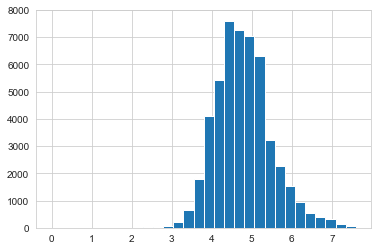

In [65]:
print('mean', np.mean(df_train['log_price']))
print('std', np.std(df_train['log_price']))
plt.hist(df_train['log_price'], bins=30)
plt.show()

In [66]:
print(df_train['accommodates'].value_counts())
print('mean', np.mean(df_train['accommodates']))
print('std', np.std(df_train['accommodates']))
df_train.groupby(by='accommodates')['log_price'].mean()

2     21560
4      8225
1      6407
3      5226
6      3263
5      2294
8      1209
7       646
10      477
16      215
12      181
9       175
14       71
11       54
15       30
13       24
Name: accommodates, dtype: int64
mean 3.1494895818766606
std 2.1567069366265703


accommodates
1     4.184886
2     4.558800
3     4.815520
4     5.064740
5     5.250416
6     5.446765
7     5.542814
8     5.724926
9     5.667061
10    5.824111
11    5.833586
12    6.127444
13    5.893654
14    6.099824
15    6.045646
16    6.080128
Name: log_price, dtype: float64

In [67]:
print(df_test['accommodates'].value_counts())
print(df_test['accommodates'].value_counts(normalize=True) * 100)
# df['gender'].value_counts(normalize=True) * 100

2     9861
4     3712
1     2926
3     2479
6     1647
5     1106
8      557
7      286
10     205
9       92
16      79
12      72
14      29
11      25
15      23
13      12
Name: accommodates, dtype: int64
2     42.667994
4     16.061616
1     12.660638
3     10.726494
6      7.126477
5      4.785600
8      2.410108
7      1.237506
10     0.887023
9      0.398079
16     0.341829
12     0.311540
14     0.125481
11     0.108174
15     0.099520
13     0.051923
Name: accommodates, dtype: float64


In [68]:
# Find the missing values
print(df_train.isnull().sum())

id                            0
log_price                     0
accommodates                  0
bathrooms                     0
cleaning_fee                  0
city                          0
host_has_profile_pic          0
host_identity_verified        0
host_response_rate            0
instant_bookable              0
latitude                      0
longitude                     0
number_of_reviews             0
bedrooms                      0
beds                          0
Apartment                     0
Bed & Breakfast               0
Boat                          0
Boutique hotel                0
Bungalow                      0
Cabin                         0
Camper/RV                     0
Castle                        0
Chalet                        0
Condominium                   0
Dorm                          0
Guest suite                   0
Guesthouse                    0
Hostel                        0
House                         0
                             ..
Westside

In [69]:
# # Correlation
# df_temp = df_train.filter(['log_price','accommodates', 'bathrooms', 'bedrooms', 'beds', 'Real Bed', 'Shared room', 
#                            'Entire home/apt', 'Private room', 'cleaning_fee', 'review_scores_rating', 
#                            'host_since_year', 'Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF', 'c_distance', 'Condominium', 'pets', 'event',
#                           'kitchen', 'heating', 'gym', 'elevator', 'pool', '#amenities'], axis=1)
# df_temp.corr()

# Add external feature in the dataset

In [70]:
data = [['NYC', 40.71427, -74.00597], ['LA', 34.05223, -118.24368], ['SF', 37.77493, -122.41942], ['DC', 38.89511, -77.03637], 
        ['Chicago', 41.85003, -87.65005],['Boston', 42.35843, -71.05977]]
df_c = pd.DataFrame(data,columns=['City','c_lat', 'c_lon'])
df_c

,City,c_lat,c_lon
0,NYC,40.71427,-74.00597
1,LA,34.05223,-118.24368
2,SF,37.77493,-122.41942
3,DC,38.89511,-77.03637
4,Chicago,41.85003,-87.65005
5,Boston,42.35843,-71.05977


In [71]:
df_merged = pd.merge(left=df_train, right=df_c, how='left', left_on=['city'], right_on=['City'])

df_train = df_merged

In [72]:
# df_train = df_train[(df_train['accommodates']<9)]
# df_train = df_train[df_train['property_type'].value_counts()>100]

In [73]:
import pyproj

geod = pyproj.Geod(ellps='WGS84') #Distance will be measured on this ellipsoid - more accurate than a spherical method

df_t = geod.inv(41.849684, -87.676270, 41.85003, -87.65005)
print(df_t)
# df_train['c_distance'] = geod.inv(df_train['latitude'], df_train['longitude'], df_train['c_lat'], df_train['c_lon'])

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = geod.inv(lon1,lat1,lon2,lat2)
  return dist

#Add/update a column to the data frame with the distances (in metres)
df_train['c_distance'] = Distance(df_train['latitude'].tolist(),df_train['longitude'].tolist(),
                                  df_train['c_lat'].tolist(),df_train['c_lon'].tolist())
df_train.head(10)

(0.031001669256653167, -179.96934404301348, 2928.567346835669)


,id,log_price,accommodates,bathrooms,cleaning_fee,city,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,...,70-79,80-84,85-89,90-94,95-100,No Reviews,City,c_lat,c_lon,c_distance
0,13662370,3.806662,2,1.5,True,Chicago,1.0,1.0,100,1,...,0,0,0,0,1,0,Chicago,41.85003,-87.65005,2177.746448
1,4765892,4.941642,2,2.0,True,LA,1.0,1.0,100,0,...,0,0,0,0,1,0,LA,34.05223,-118.24368,1835.239616
2,21169968,4.941642,5,1.0,True,NYC,1.0,1.0,100,1,...,0,0,1,0,0,0,NYC,40.71427,-74.00597,7612.447530
3,7939196,4.867534,6,1.0,True,NYC,1.0,1.0,70,0,...,0,1,0,0,0,0,NYC,40.71427,-74.00597,3433.336713
4,16078894,4.836282,6,1.0,True,NYC,1.0,0.0,100,0,...,0,0,0,0,1,0,NYC,40.71427,-74.00597,6760.318460
5,10122015,5.220356,5,2.0,True,Boston,1.0,0.0,94,0,...,0,0,0,0,0,1,Boston,42.35843,-71.05977,5278.985802
6,13762269,5.686975,2,1.0,False,LA,1.0,0.0,100,0,...,0,0,0,0,1,0,LA,34.05223,-118.24368,23407.871438
7,15174230,3.555348,2,1.0,False,NYC,1.0,0.0,100,0,...,0,1,0,0,0,0,NYC,40.71427,-74.00597,9165.943774
8,15716280,4.234107,2,2.0,True,NYC,1.0,1.0,100,0,...,0,0,0,1,0,0,NYC,40.71427,-74.00597,3863.573908
9,10806613,3.555348,1,1.0,False,Boston,1.0,1.0,90,0,...,0,0,0,0,1,0,Boston,42.35843,-71.05977,14743.804003


In [74]:
# Delete column from df_train
del df_train['city']
del df_train['City']

In [75]:
# Add new feature c_distance

df_merged_t = pd.merge(left=df_test, right=df_c, how='left', left_on=['city'], right_on=['City'])
df_test = df_merged_t

#Get distance between pairs of lat-lon points
def Distance(lat1,lon1,lat2,lon2):
  az12,az21,dist = geod.inv(lon1,lat1,lon2,lat2)
  return dist

#Add/update a column to the data frame with the distances (in metres)
df_test['c_distance'] = Distance(df_test['latitude'].tolist(),df_test['longitude'].tolist(),
                                  df_test['c_lat'].tolist(),df_test['c_lon'].tolist())

In [76]:
data = [['NYC', 40.71427, -74.00597], ['LA', 34.05223, -118.24368], ['SF', 37.77493, -122.41942], ['DC', 38.89511, -77.03637], 
        ['Chicago', 41.85003, -87.65005],['Boston', 42.35843, -71.05977]]
df_c = pd.DataFrame(data,columns=['City','c_lat', 'c_lon'])
df_c

,City,c_lat,c_lon
0,NYC,40.71427,-74.00597
1,LA,34.05223,-118.24368
2,SF,37.77493,-122.41942
3,DC,38.89511,-77.03637
4,Chicago,41.85003,-87.65005
5,Boston,42.35843,-71.05977


In [77]:
# Delete column from df_train
del df_test['city']
del df_test['City']

In [78]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Experiment

In [79]:
feature = list(df_train)

# items to be removed 
unwanted_feature = {'id','log_price', 'latitude', 'longitude', 'c_lat', 'c_lon'}


list1 = [ele for ele in feature if ele not in unwanted_feature]

list1

['accommodates',
 'bathrooms',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'number_of_reviews',
 'bedrooms',
 'beds',
 'Apartment',
 'Bed & Breakfast',
 'Boat',
 'Boutique hotel',
 'Bungalow',
 'Cabin',
 'Camper/RV',
 'Castle',
 'Chalet',
 'Condominium',
 'Dorm',
 'Guest suite',
 'Guesthouse',
 'Hostel',
 'House',
 'Hut',
 'In-law',
 'Loft',
 'Other',
 'Serviced apartment',
 'Tent',
 'Timeshare',
 'Tipi',
 'Townhouse',
 'Train',
 'Treehouse',
 'Vacation home',
 'Villa',
 'Yurt',
 'Entire home/apt',
 'Private room',
 'Shared room',
 '#amenities',
 'family',
 'pets',
 'event',
 'kitchen',
 'heating',
 'gym',
 'elevator',
 'pool',
 'Airbed',
 'Couch',
 'Futon',
 'Pull-out Sofa',
 'Real Bed',
 'flexible',
 'moderate',
 'strict',
 'super_strict_30',
 'super_strict_60',
 'Boston',
 'Chicago',
 'DC',
 'LA',
 'NYC',
 'SF',
 'host_since_year',
 'last_review_year',
 0.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2

In [80]:
# select the columns
X_columns = list1
y_column = ['log_price']

In [81]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (40045, 688)
y_train (40045, 1)
X_test (10012, 688)
y_test (10012, 1)


In [82]:
def model_training(model_name, model, X_train, y_train):
    model.fit(X_train, y_train)
    return model
    
def model_prediction(model, X_test):
    y_pred = model.predict(X_test)
    return y_pred

def model_evaluation(model_name, y_test, y_pred):
    print(model_name)
    print('MAE', mean_absolute_error(y_test, y_pred))
    print('RMSE', np.sqrt(mean_squared_error(y_test, y_pred)))
#     plt.scatter(y_test, y_pred, alpha=0.3)
#     plt.plot(range(0,5000000, 100), range(0,5000000, 100), '--r', alpha=0.3, label='Line1')
#     plt.title(model_name)
#     plt.xlabel('True Value')
#     plt.ylabel('Predict Value')
#     plt.xlim([0, 5000000])
#     plt.ylim([0, 5000000])
#     plt.show()
    print('')

def run_experiment(model_name, model, X_train, y_train, X_test):
    train_model = model_training(model_name, model, X_train, y_train)
    predictions = model_prediction(train_model, X_test)
    model_evaluation(model_name, y_test, predictions)
    
# run_experiment('Linear Regression', LinearRegression(), X_train, y_train, X_test)
# run_experiment('KNN 5', KNeighborsRegressor(5), X_train, y_train, X_test)
# run_experiment('KNN 2', KNeighborsRegressor(2), X_train, y_train, X_test)
# run_experiment('Decision Tree', DecisionTreeRegressor(), X_train, y_train, X_test)
# run_experiment('Random Forest 10', RandomForestRegressor(10), X_train, y_train, X_test)
# run_experiment('Random Forest 100', RandomForestRegressor(100), X_train, y_train, X_test)
# run_experiment('Random Forest 200', RandomForestRegressor(200), X_train, y_train, X_test)
# run_experiment('Gradient Boosting', GradientBoostingRegressor(), X_train, y_train, X_test)



# Model Training

In [83]:
# train a linear regression
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Model Evaluation

RMSE 0.4267


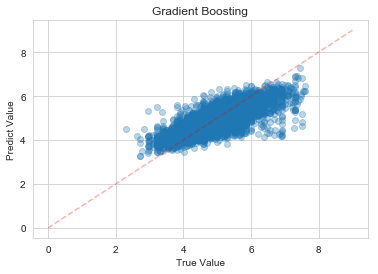

In [84]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 4))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Gradient Boosting')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

# Prepare submission

In [85]:
df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

KeyError: '[\'16thStreetHeights\' \'AdamsMorgan\' \'AlamoSquare\' \'AlbanyPark\'\n \'AlondraPark\' \'AlphabetCity\' \'AmericanUniversityPark\' \'Annadale\'\n \'Arboretum\' \'ArcherHeights\' \'Arleta\' \'ArmourSquare\' \'Artesia\'\n \'ArtsDistrict\' \'Ashburn\' \'AtwaterVillage\' \'AuburnGresham\' \'BackBay\'\n \'BackoftheYards\' \'BalboaTerrace\' \'BaldwinHills\' \'BaldwinPark\'\n \'BarneyCircle\' \'BarryFarm\' \'BathBeach\' \'BatteryParkCity\' \'BayRidge\'\n \'BeaconHill\' \'BedfordPark\' \'BelAir/BeverlyCrest\' \'BelmontCragin\'\n \'Benning\' \'BenningHeights\' \'BenningRidge\' \'BergenBeach\' \'BernalHeights\'\n \'BeverlyHills\' \'BoerumHill\' \'BoroughPark\' \'BoyleHeights\' \'BrightonBeach\'\n \'BrightonPark\' \'BrooklynHeights\' \'BrooklynNavyYard\' \'BuenaVista\'\n \'CahuengaPass\' \'Cambridge\' \'CanogaPark\' \'CapitolHill\' \'CarrollGardens\'\n \'CarverLangston\' \'CastleHill\' \'CastletonCorners\' \'CathedralHeights\'\n \'CentralNortheast/MahaningHeights\' \'ChestnutHill\' \'ChevyChase\'\n \'Chillum,MD\' \'CityIsland\' \'CivicCenter\' \'ClevelandPark\' \'Clifton\'\n \'ClintonHill\' \'Co-opCity\' \'CobbleHill\' \'ColeValley\' \'CollegePoint\'\n \'ColonialVillage\' \'ColumbiaHeights\' \'ColumbiaStreetWaterfront\' \'Commerce\'\n \'ConcourseVillage\' \'ConeyIsland\' \'CongressHeights\' \'CoolidgeCorner\'\n \'CowHollow\' \'CrockerAmazon\' \'CrownHeights\' \'CulverCity\' \'CypressPark\'\n \'DalyCity\' \'DelRey\' \'DiamondHeights\' \'Ditmars/Steinway\' \'DonganHills\'\n \'Downtown/PennQuarter\' \'DowntownBrooklyn\' \'DowntownCrossing\'\n \'DuboceTriangle\' \'DupontCircle\' \'DupontPark\' \'DykerHeights\' \'EagleRock\'\n \'EastBoston\' \'EastCorner\' \'EastElmhurst\' \'EastFlatbush\' \'EastHarlem\'\n \'EastHollywood\' \'EastLosAngeles\' \'EastNewYork\' \'EastSanGabriel\'\n \'EastVillage\' \'EastlandGardens\' \'EchoPark\' \'EdisonPark\' \'ElMonte\'\n \'ElSegundo\' \'ElSereno\' \'ElmPark\' \'Eltingville\' \'ElysianValley\'\n \'FinancialDistrict\' "Fisherman\'sWharf" \'FlatironDistrict\' \'FoggyBottom\'\n \'ForestHill\' \'ForestHills\' \'FortDavis\' \'FortDupont\' \'FortGreene\'\n \'FortLincoln\' \'FortTotten\' \'FortWadsworth\' \'FreshMeadows\'\n \'FriendshipHeights\' \'GarfieldHeights\' \'GarfieldPark\' \'GarfieldRidge\'\n \'GlassellPark\' \'GlenPark\' \'GloverPark\' \'GoldCoast\' \'GoodHope\'\n \'GovernmentCenter\' \'GramercyPark\' \'GranadaHillsNorth\' \'GrandCrossing\'\n \'Graniteville\' \'GrantCity\' \'GreatKills\' \'GreenwichVillage\'\n \'GreenwoodHeights\' \'GrymesHill\' \'HamiltonHeights\' \'HarborCity\'\n \'HarborGateway\' \'HawaiianGardens\' \'HayesValley\' "Hell\'sKitchen"\n \'HermosaBeach\' \'HighlandPark\' \'HilcrestHeights/MarlowHeights,MD\'\n \'Hillbrook\' \'HollywoodHills\' \'HowardBeach\' \'HudsonSquare\' \'Huguenot\'\n \'HumboldtPark\' \'HuntingtonPark\' \'HuntsPoint\' \'HydePark\' \'InnerSunset\'\n \'IrvingPark\' \'IvyCity\' \'JacksonHeights\' \'JamaicaPlain\' \'JeffersonPark\'\n \'JudiciarySquare\' \'KewGardenHills\' \'KingmanPark\' \'KingsbridgeHeights\'\n \'KipsBay\' \'LaCanadaFlintridge\' \'LaCrescenta-Montrose\' \'LaHabra\'\n \'LaMirada\' \'LaPuente\' \'LakeBalboa\' \'LamondRiggs\' \'LaurelCanyon\'\n \'LeDroitPark\' \'LeatherDistrict\' \'LeffertsGarden\' \'LighthouseHIll\'\n \'LincolnHeights\' \'LincolnPark\' \'LincolnSquare\' \'Lindenwood\' \'LittleItaly\'\n \'LittleItaly/UIC\' \'LittleVillage\' \'LoganCircle\' \'LoganSquare\' \'LongBeach\'\n \'LongIslandCity\' \'LosFeliz\' \'LowerEastSide\' \'LowerHaight\'\n \'ManhattanBeach\' \'ManorPark\' \'MarVista\' \'MarbleHill\' \'MarinaDelRey\'\n \'MarinePark\' \'MarinersHarbor\' \'MarshallHeights\' \'MassachusettsHeights\'\n \'McKinleyPark\' \'MeatpackingDistrict\' \'MeiersCorners\' \'MichiganPark\'\n \'MiddleVillage\' \'MidlandBeach\' \'MidtownEast\' \'MillBasin\' \'MissionBay\'\n \'MissionDistrict\' \'MissionHill\' \'MissionHills\' \'MissionTerrace\'\n \'Montebello\' \'MontecitoHeights\' \'MontereyHills\' \'MontereyPark\'\n \'MorganPark\' \'MorningsideHeights\' \'MorrisHeights\' \'MorrisPark\'\n \'MottHaven\' \'MountEden\' \'MountPleasant\' \'MountVernonSquare\'\n \'MountWashington\' \'Mt.Pleasant\' \'MtRainier/Brentwood,MD\' \'MurrayHill\'\n \'NavyYard\' \'NaylorGardens\' \'NearNorthSide\' \'NearNortheast\'\n \'NearNortheast/HStreetCorridor\' \'NearWestSide\' \'NewBrighton\'\n \'NewDorpBeach\' \'NobHill\' \'NoeValley\' \'NorthBeach\' \'NorthCenter\'\n \'NorthClevelandPark\' \'NorthEnd\' \'NorthHillsEast\' \'NorthHillsWest\'\n \'NorthHollywood\' \'NorthLawndale\' \'NorthMichiganPark\' \'NorthPark\'\n \'NorwoodPark\' "O\'Hare" \'ObservatoryCircle\' "OldSoldiers\'Home" \'OldTown\'\n \'OuterSunset\' \'OzonePark\' \'PacificHeights\' \'PacificPalisades\'\n \'PalosVerdes\' \'PanoramaCity\' \'Paramount\' \'ParkSlope\' \'ParkVersailles\'\n \'ParkView\' \'PelhamBay\' \'PicoRivera\' \'PleasantHill\' \'PleasantPlains\'\n \'PortMorris\' \'PortRichmond\' \'PortagePark\' \'PorterRanch\' \'PotreroHill\'\n \'PresidioHeights\' \'ProspectHeights\' \'Pullman\' \'RanchoPalosVerdes\'\n \'RandallManor\' \'RandleHighlands\' \'RedHook\' \'RedondoBeach\' \'RegoPark\'\n \'RichmondDistrict\' \'RichmondHill\' \'RiverNorth\' \'RiverTerrace\' \'RiverWest\'\n \'RogersPark\' \'RollingHills\' \'RollingHillsEstates\' \'RooseveltIsland\'\n \'RoscoeVillage\' \'Rossville\' \'RussianHill\' \'SanGabriel\' \'SanMarino\'\n \'SanPedro\' \'SantaFeSprings\' \'SantaMonica\' \'SeaCliff\' \'SeaGate\'\n \'SheepsheadBay\' \'ShepherdPark\' \'ShermanOaks\' \'ShipleyTerrace\'\n \'SierraMadre\' \'SignalHill\' \'SilverLake\' \'SilverSpring,MD\' \'SkidRow\'\n \'Skyland\' \'SouthBeach\' \'SouthBoston\' \'SouthChicago\' \'SouthElMonte\'\n \'SouthEnd\' \'SouthGate\' \'SouthLA\' \'SouthLoop/PrintersRow\' \'SouthOzonePark\'\n \'SouthPasadena\' \'SouthRobertson\' \'SouthSanGabriel\' \'SouthShore\'\n \'SouthStreetSeaport\' \'SouthWhittier\' \'SouthwestWaterfront\' \'SpringValley\'\n \'SpuytenDuyvil\' \'St.Elizabeths\' \'St.George\' \'StudioCity\' \'SunValley\'\n \'SunsetPark\' \'TakomaPark,MD\' \'TelegraphHill\' \'TempleCity\' \'TheBronx\'\n \'TheCastro\' \'TheRockaways\' \'TheaterDistrict\' \'ThrogsNeck\'\n \'TimesSquare/TheatreDistrict\' \'TodtHill\' \'TolucaLake\' \'Tottenville\'\n \'TruxtonCircle\' \'TwinPeaks\' \'UStreetCorridor\' \'UkrainianVillage\'\n \'UnionSquare\' \'UniversityHeights\' \'UpperEastSide\' \'UpperWestSide\'\n \'ValleyGlen\' \'ValleyVillage\' \'VanNest\' \'VanNuys\' \'Vernon\' \'VinegarHill\'\n \'VisitacionValley\' \'WashingtonHeights\' \'WashingtonHighlands\'\n \'WashingtonPark\' \'WesleyHeights\' \'WestAdams\' \'WestAthens\' \'WestBrighton\'\n \'WestCovina\' \'WestElsdon\' \'WestEnd\' \'WestFarms\' \'WestHills\'\n \'WestHollywood\' \'WestLawn\' \'WestLoop/Greektown\' \'WestLosAngeles\'\n \'WestPortal\' \'WestPuenteValley\' \'WestRidge\' \'WestRoxbury\'\n \'WestTown/NobleSquare\' \'WestVillage\' \'Westchester/PlayaDelRey\'\n \'WestchesterVillage\' \'WesternAddition/NOPA\' \'WickerPark\' \'WindsorTerrace\'\n \'Winthrop\' \'Woodland\' \'WoodlandHills/WarnerCenter\' \'WoodleyPark\'] not in index'

In [ ]:
df_test[['id', 'log_price']].to_csv('Submission/AirBnB_Submission_5.csv', index=False)